In [4]:
from datasets import load_dataset
import numpy as np

In [2]:
dataset = load_dataset('cifar10')

Found cached dataset cifar10 (/home/shmuley/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)
100%|█████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 14.47it/s]


In [19]:
image = dataset['train'][0]['img']

In [20]:
image = image.convert('RGB')

In [21]:
image = np.array(image)

In [31]:
image[:,:,0]

(32, 32)

In [33]:
from my_cnn.functional import convolve_2d

In [35]:
kernel = np.random.rand(3,3)

In [36]:
kernel

array([[0.77751604, 0.13321648, 0.94671207],
       [0.83653159, 0.64128579, 0.00467501],
       [0.13876527, 0.67177809, 0.19111727]])

In [37]:
convolve_2d(image[:,:,0],kernel)

array([[567.93777524, 578.7237189 , 593.72275124, ..., 559.75988351,
        555.68562998, 549.9750051 ],
       [672.91973477, 686.4861773 , 699.24616555, ..., 669.82381267,
        664.13672505, 656.42816828],
       [746.62426027, 761.06763718, 774.0481443 , ..., 751.83441787,
        743.15589767, 733.4974056 ],
       ...,
       [460.72433873, 458.15131895, 453.56651981, ..., 435.62958364,
        418.17722582, 445.20672281],
       [457.66368123, 465.24539841, 471.89049997, ..., 448.69232049,
        433.88677422, 436.55943671],
       [441.95140334, 453.83856283, 470.92812131, ..., 427.6557182 ,
        422.01425437, 420.41609818]])

In [1]:
from my_cnn import layers
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


In [2]:
image = Image.open('data/image.jpg')

In [14]:
image.show()

In [3]:
convlayer = layers.Convolutional(18, 7)

In [4]:
np.asarray(image).shape[:2]

(256, 256)

In [5]:
out = convlayer.forward(np.asarray(image))

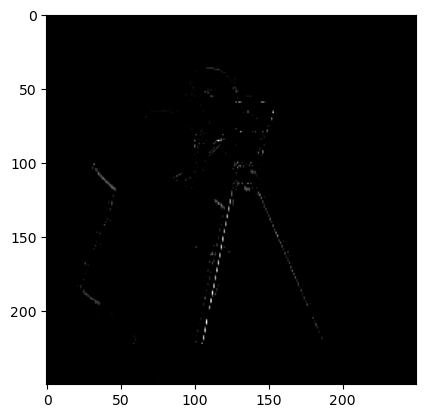

In [18]:
plt.imshow(out[:,:,3], cmap='gray')

In [7]:
pool = layers.MaxPooling(4)
out2 = pool.forward(out)

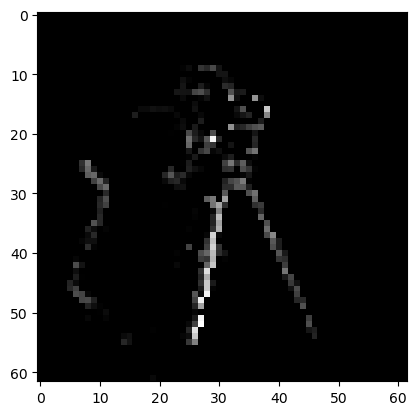

In [19]:
plt.imshow(out2[:,:,3], cmap='gray')

In [8]:
out2.shape

(62, 62, 18)

In [9]:
linear = layers.Linear(62 * 62 * 18, 10)
out3 = linear.forward(out2)
print(out3)

[9.43217329e-14 1.95755863e-12 2.33739545e-23 5.59447789e-13
 5.92631168e-39 1.43779740e-21 1.46244041e-01 8.53755959e-01
 8.27621026e-14 5.03164668e-20]
